In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#os.environ['HDF5_DISABLE_VERSION_CHECK']='True'

import pandas as pd

import numpy as np

from scipy import stats
from scipy.stats import percentileofscore
from scipy.stats import ttest_ind

from tqdm.notebook import tqdm
import os

import warnings
warnings.filterwarnings("ignore")

dv = 'REACTION_TIME'  # options {'percentile', 'REACTION_TIME'}


### Qauntify the strength of the object-centric signal for each model 

In [2]:
run_names_dict = {'imagenet_resnet50_test': 'imagenet_resnet50',
                  'dino_resnet50_test': 'dino_resnet50',
                  'mae_vit_base_test_16_k': 'mae_vitb16_key', 
                  'mae_vit_base_test_16_v': 'mae_vitb16_value', 
                  'vit_base_test_16_k': 'dino_vitb16_key',
                  'vit_base_test_16_v': 'dino_vitb16_value', 
                  'vit_base_test_8_k': 'dino_vitb8_key', 
                  'vit_base_test_8_v': 'dino_vitb8_value', 
                  'dinov2_vitb14_test_14_k': 'dinov2_vitb14_key', 
                  'dinov2_vitb14_test_14_v': 'dinov2_vitb14_value',
                  'dinov2_vitl14_test_14_k': 'dinov2_vitl14_key', 
                  'dinov2_vitl14_test_14_v': 'dinov2_vitl14_value', 
                  'dinov2_vitg14_test_14_k': 'dinov2_vitg14_key', 
                  'dinov2_vitg14_test_14_v': 'dinov2_vitg14_key', 
                  
                 }

color_dict = {'imagenet_resnet50_test': 'palegreen', #steelblue
              'dino_resnet50_test': 'darkviolet',
              'mae_vit_base_test_16_k': '#2ca02c',  #green
              'mae_vit_base_test_16_v': '#d62728',  #red
              'vit_base_test_16_k': 'lightpink', #lightpurple
              'vit_base_test_16_v': '#e377c2', #cyan
              'vit_base_test_8_k': 'magenta', 
              'vit_base_test_8_v': 'lightsteelblue', 
              'dinov2_vitb14_test_14_k': '#1f77b4', # steelblue
              'dinov2_vitb14_test_14_v': '#e377c2', #palepink
              'dinov2_vitl14_test_14_k': '#ff7f0e', # orange
              'dinov2_vitl14_test_14_v': '#7f7f7f', #dark gray
              'dinov2_vitg14_test_14_k': '#8c564b', # brown
              'dinov2_vitg14_test_14_v': '#bcbd22', #yellowgreen
             }

color_dict_simple = {'imagenet_resnet50_test': 'palegreen', #steelblue
              'dino_resnet50_test': 'darkviolet',
              'mae_vit_base_test_16_k': 'green',  #green
              'mae_vit_base_test_16_v': 'green',  #red
              'vit_base_test_16_k': 'lightpink', #lightpurple
              'vit_base_test_16_v': 'lightpink', #cyan
              'vit_base_test_8_k': 'lightsteelblue', 
              'vit_base_test_8_v': 'lightsteelblue', 
              'dinov2_vitb14_test_14_k': 'steelblue', # steelblue
              'dinov2_vitb14_test_14_v': 'steelblue', #palepink
              'dinov2_vitl14_test_14_k': 'orange', # orange
              'dinov2_vitl14_test_14_v': 'orange', #dark gray
              'dinov2_vitg14_test_14_k': 'brown', # brown
              'dinov2_vitg14_test_14_v': 'brown', #yellowgreen
             }

run_names_dict_abb = {'imagenet_resnet50_test': 'imagenet_resnet50',
                  'dino_resnet50_test': 'dino_resnet50',
                  'mae_vit_base_test_16_k': 'mae_vitb16', 
                  'mae_vit_base_test_16_v': 'mae_vitb16', 
                  'vit_base_test_16_k': 'dino_vitb16',
                  'vit_base_test_16_v': 'dino_vitb16', 
                  'vit_base_test_8_k': 'dino_vitb8', 
                  'vit_base_test_8_v': 'dino_vitb8', 
                  'dinov2_vitb14_test_14_k': 'dinov2_vitb14', 
                  'dinov2_vitb14_test_14_v': 'dinov2_vitb14',
                  'dinov2_vitl14_test_14_k': 'dinov2_vitl14', 
                  'dinov2_vitl14_test_14_v': 'dinov2_vitl14', 
                  'dinov2_vitg14_test_14_k': 'dinov2_vitg14', 
                  'dinov2_vitg14_test_14_v': 'dinov2_vitg14', 
                 }

colors = list(color_dict.values())
colors_simple = list(color_dict_simple.values())
model_names = list(run_names_dict_abb.values())

In [3]:
df_res = pd.DataFrame(run_names_dict.items(), columns=['roc_run_name', 'run_name'])
df_res['color'] = colors
df_res['color_simple'] = colors_simple
df_res['model_name'] = model_names
df_res

,roc_run_name,run_name,color,color_simple,model_name
0,imagenet_resnet50_test,imagenet_resnet50,palegreen,palegreen,imagenet_resnet50
1,dino_resnet50_test,dino_resnet50,darkviolet,darkviolet,dino_resnet50
2,mae_vit_base_test_16_k,mae_vitb16_key,#2ca02c,green,mae_vitb16
3,mae_vit_base_test_16_v,mae_vitb16_value,#d62728,green,mae_vitb16
4,vit_base_test_16_k,dino_vitb16_key,lightpink,lightpink,dino_vitb16
5,vit_base_test_16_v,dino_vitb16_value,#e377c2,lightpink,dino_vitb16
6,vit_base_test_8_k,dino_vitb8_key,magenta,lightsteelblue,dino_vitb8
7,vit_base_test_8_v,dino_vitb8_value,lightsteelblue,lightsteelblue,dino_vitb8
8,dinov2_vitb14_test_14_k,dinov2_vitb14_key,#1f77b4,steelblue,dinov2_vitb14
9,dinov2_vitb14_test_14_v,dinov2_vitb14_value,#e377c2,steelblue,dinov2_vitb14


In [4]:
from sklearn import metrics

ROCs_dir = './outputs/grouping/ROCs/'
file_names = os.listdir(ROCs_dir)
run_names = []
run_ROCs = []

auc_dict = {}

for file_name in file_names:
    
    if 'ipynb' in file_name:
        continue
    ROC_data = np.load(ROCs_dir+file_name).mean(0)
    tpr = ROC_data[0]
    fpr = ROC_data[1]
    
    run_names.append(file_name)
    area_under_ROC = metrics.auc(fpr, tpr)
    run_ROCs.append(area_under_ROC) 
    
    auc_dict[file_name.split('.')[0]] = area_under_ROC
    
    print(file_name, area_under_ROC)

    
df_res = pd.merge(df_res, pd.DataFrame(auc_dict.items(), columns=['roc_run_name', 'auc_roc']), on='roc_run_name')
df_res_sorted = df_res.sort_values(by=['auc_roc'], ascending=False)
# df_res_sorted = df_res.groupby(['model_name'], as_index=False).max().sort_values(by=['auc_roc'], ascending=False)
# df_res_sorted

dinov2_vitl14_test_14_v.npy 0.784809887390008
imagenet_resnet50_test.npy 0.6111764279591292
vit_base_test_8_k.npy 0.7683779504261626
dinov2_vitg14_test_14_v.npy 0.7682883818681058
mae_vit_base_test_16_v.npy 0.8158372136004509
mae_vit_base_test_16_k.npy 0.8400340909790036
dinov2_vitb14_test_14_k.npy 0.870257282037733
vit_base_test_16_k.npy 0.7967316063050414
vit_base_test_8_v.npy 0.7908676876843924
dinov2_vitg14_test_14_k.npy 0.8065995168621118
vit_base_test_16_v.npy 0.7858530640329012
dinov2_vitl14_test_14_k.npy 0.8557333335267299
dinov2_vitb14_test_14_v.npy 0.7691072753784444
dino_resnet50_test.npy 0.6182340354643514


dinov2_vitb14_test_14_k.npy
dinov2_vitl14_test_14_k.npy
mae_vit_base_test_16_k.npy
dinov2_vitg14_test_14_k.npy
vit_base_test_16_k.npy
vit_base_test_8_v.npy
dino_resnet50_test.npy
imagenet_resnet50_test.npy


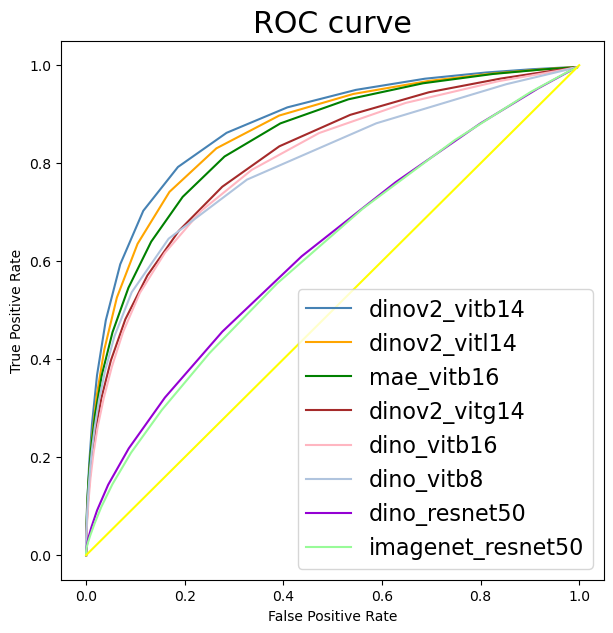

In [5]:

# fig = plt.figure(figsize=(7, 7))
# gs = fig.add_gridspec(1,1)

# ax = plt.subplot(gs[0,0])

fig, ax = plt.subplots(figsize=(7, 7))

tetas = 1 - np.arange(0,21)/20
for model_name in df_res_sorted['model_name'].unique():
   
    df_res_run = df_res[df_res['model_name']==model_name].sort_values(by=['auc_roc'], ascending=False)
    
    run_name = df_res_run['roc_run_name'].iloc[0] + '.npy'
    label = model_name
    color = df_res_run['color_simple'].iloc[0]
    print(run_name)
    
    ROC_data = np.load(ROCs_dir+run_name).mean(0)
    ax.plot(ROC_data[1], ROC_data[0], label=label, color=color)
    
plt.rcParams.update({'font.size': 18})
ax.set_title('ROC curve')
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.axis('on')
ax.plot(tetas, tetas, 'yellow')
ax.legend(fontsize=16)
plt.show()

fig.savefig("figures/ROC_curve_sorted.png", bbox_inches='tight', dpi=300)

## read in the model predictions and calculate accuracy and correlation with subjects

In [6]:
model_restuls_dir = './outputs/grouping/model_att_steps/' 
file_names = np.sort(os.listdir(model_restuls_dir))

In [7]:

# def load_model_results():
    
def model_acc(df_comp):
    acc = []
    for max_steps in range(0,21):
        hit = len(df_comp[(df_comp['same_diff']=='same') & (df_comp['model_pred']<max_steps)])
        miss = len(df_comp[(df_comp['same_diff']=='same') & (df_comp['model_pred']>=max_steps)])
        fp = len(df_comp[(df_comp['same_diff']=='diff') & (df_comp['model_pred']<max_steps)])
        tn = len(df_comp[(df_comp['same_diff']=='diff') & (df_comp['model_pred']>=max_steps)])

        #print(f'hit: {hit}  miss: {miss}  false positive: {fp}  true negative: {tn}')

        acc.append((hit+tn) / 1024)
    
    acc = np.array(acc)
    return np.max(acc), np.argmax(acc)

def model_beh_corr(df_comp, dv):
    
#     split_corr = stats.spearmanr(df_comp['subs_mean_p'], df_comp['distance'])
    split_corr = stats.spearmanr(df_comp[dv], df_comp['model_pred'])

#     df_comp_same = df_comp[(df_comp['same_diff'] == 'same') ]  #& (df_comp['model_pred']<30)
#     #df_comp_same = df_comp_same[df_comp_same['model_pred'] <21 ]

#     split_corr = stats.spearmanr(df_comp_same['subs_mean_p'], df_comp_same['distance'])
#     split_corr = stats.spearmanr(df_comp_same['subs_mean_p'], df_comp_same['model_pred'])
    
    return split_corr[0]
    

In [8]:
df_test = pd.read_excel("./datasets/dataset_grouping/test_data_grouping_with_mean_beh.xls", index_col=0)  

model_restuls_dir = './outputs/grouping/model_att_steps/' 
file_names = np.sort(os.listdir(model_restuls_dir))
all_acc = []
all_corr = []
exp_names = []

acc_dict = dict([(i,0) for i in df_res['roc_run_name']])

corr_dict =  acc_dict.copy()

dv = 'REACTION_TIME'  # options {'percentile', 'REACTION_TIME'}

for exp_name in file_names:
    
    df_comp = df_test.copy()
    
    if 'ipynb' in exp_name:
        continue
        
    exp_names.append(exp_name)
    model_preds = np.load(model_restuls_dir + exp_name) 
    df_comp['model_pred'] = list(model_preds)
    
    run_name = '_'.join(exp_name.split('_')[:-2])
    #run_name = df_res[df_res['roc_run_name'] == run_name]['model_name'].iloc[0]
    
    acc = acc_dict[run_name]
    corr = corr_dict[run_name]

    max_acc, max_acc_step = model_acc(df_comp)
    
    all_acc.append(max_acc)
    
    if dv == 'REACTION_TIME':
        sm_corr = model_beh_corr(df_comp, 'subs_mean_rt')
    elif dv == 'percentile':
        sm_corr = model_beh_corr(df_comp, 'subs_mean_p')
    
    all_corr.append(sm_corr)
    if max_acc > acc_dict[run_name]:
        acc_dict[run_name] = max_acc
        corr_dict[run_name] = sm_corr
        

In [10]:
if 'model_acc' not in df_res.columns:
    df_res = pd.merge(df_res, pd.DataFrame(acc_dict.items(), columns=['roc_run_name', 'model_acc']), on='roc_run_name')
else:
    df_res['model_acc'] = list(acc_dict.values())
    
if 'model_human_corr' not in df_res.columns:
    df_res = pd.merge(df_res, pd.DataFrame(corr_dict.items(), columns=['roc_run_name', 'model_human_corr']), on='roc_run_name')
else:
    df_res['model_human_corr'] = list(corr_dict.values())

# df_res_sorted = df_res.sort_values(by=['auc_roc'], ascending=False)

In [11]:
sub_sub_corr = 0.417
sub_acc = 0.9

split_corr = stats.spearmanr(df_test['subs_mean_p'], df_test['distance'])
distance_model_corr = split_corr[0]
distance_acc = 0.5

#df_res.loc[len(df_res.index)] = ['subject','subject-subject', 'black','subject-subject', 0, sub_acc, sub_sub_corr] 

if 'distance' not in df_res['roc_run_name'].unique():
    df_res.loc[len(df_res.index)] = ['distance','euclidean', 'gray', 'gray','euclidean', 0, distance_acc, distance_model_corr] 

df_res

,roc_run_name,run_name,color,color_simple,model_name,auc_roc,model_acc,model_human_corr
0,imagenet_resnet50_test,imagenet_resnet50,palegreen,palegreen,imagenet_resnet50,0.611176,0.536133,0.102727
1,dino_resnet50_test,dino_resnet50,darkviolet,darkviolet,dino_resnet50,0.618234,0.536133,0.116228
2,mae_vit_base_test_16_k,mae_vitb16_key,#2ca02c,green,mae_vitb16,0.840034,0.722656,0.218501
3,mae_vit_base_test_16_v,mae_vitb16_value,#d62728,green,mae_vitb16,0.815837,0.711914,0.217418
4,vit_base_test_16_k,dino_vitb16_key,lightpink,lightpink,dino_vitb16,0.796732,0.713867,0.201351
5,vit_base_test_16_v,dino_vitb16_value,#e377c2,lightpink,dino_vitb16,0.785853,0.705078,0.212488
6,vit_base_test_8_k,dino_vitb8_key,magenta,lightsteelblue,dino_vitb8,0.768378,0.728516,0.186903
7,vit_base_test_8_v,dino_vitb8_value,lightsteelblue,lightsteelblue,dino_vitb8,0.790868,0.750000,0.226669
8,dinov2_vitb14_test_14_k,dinov2_vitb14_key,#1f77b4,steelblue,dinov2_vitb14,0.870257,0.774414,0.238390
9,dinov2_vitb14_test_14_v,dinov2_vitb14_value,#e377c2,steelblue,dinov2_vitb14,0.769107,0.721680,0.212549


### plot accuracies 

In [12]:
df_res_sorted = df_res.sort_values(by=['model_acc'], ascending=False) #['run_name']
df_res_sorted

,roc_run_name,run_name,color,color_simple,model_name,auc_roc,model_acc,model_human_corr
8,dinov2_vitb14_test_14_k,dinov2_vitb14_key,#1f77b4,steelblue,dinov2_vitb14,0.870257,0.774414,0.238390
10,dinov2_vitl14_test_14_k,dinov2_vitl14_key,#ff7f0e,orange,dinov2_vitl14,0.855733,0.756836,0.241394
12,dinov2_vitg14_test_14_k,dinov2_vitg14_key,#8c564b,brown,dinov2_vitg14,0.806600,0.754883,0.194759
7,vit_base_test_8_v,dino_vitb8_value,lightsteelblue,lightsteelblue,dino_vitb8,0.790868,0.750000,0.226669
13,dinov2_vitg14_test_14_v,dinov2_vitg14_key,#bcbd22,brown,dinov2_vitg14,0.768288,0.733398,0.189129
6,vit_base_test_8_k,dino_vitb8_key,magenta,lightsteelblue,dino_vitb8,0.768378,0.728516,0.186903
2,mae_vit_base_test_16_k,mae_vitb16_key,#2ca02c,green,mae_vitb16,0.840034,0.722656,0.218501
9,dinov2_vitb14_test_14_v,dinov2_vitb14_value,#e377c2,steelblue,dinov2_vitb14,0.769107,0.721680,0.212549
4,vit_base_test_16_k,dino_vitb16_key,lightpink,lightpink,dino_vitb16,0.796732,0.713867,0.201351
3,mae_vit_base_test_16_v,mae_vitb16_value,#d62728,green,mae_vitb16,0.815837,0.711914,0.217418


In [13]:
df_res_sorted = df_res_sorted.groupby(['model_name'], as_index=False).max()

df_res_sorted = df_res_sorted.sort_values(by=['model_acc']) 
df_res_sorted
#.max().sort_values(by=['auc_roc'], ascending=False)
# df_res_sorted

,model_name,roc_run_name,run_name,color,color_simple,auc_roc,model_acc,model_human_corr
6,euclidean,distance,euclidean,gray,gray,0.000000,0.500000,0.104391
0,dino_resnet50,dino_resnet50_test,dino_resnet50,darkviolet,darkviolet,0.618234,0.536133,0.116228
7,imagenet_resnet50,imagenet_resnet50_test,imagenet_resnet50,palegreen,palegreen,0.611176,0.536133,0.102727
1,dino_vitb16,vit_base_test_16_v,dino_vitb16_value,lightpink,lightpink,0.796732,0.713867,0.212488
8,mae_vitb16,mae_vit_base_test_16_v,mae_vitb16_value,#d62728,green,0.840034,0.722656,0.218501
2,dino_vitb8,vit_base_test_8_v,dino_vitb8_value,magenta,lightsteelblue,0.790868,0.750000,0.226669
4,dinov2_vitg14,dinov2_vitg14_test_14_v,dinov2_vitg14_key,#bcbd22,brown,0.806600,0.754883,0.194759
5,dinov2_vitl14,dinov2_vitl14_test_14_v,dinov2_vitl14_value,#ff7f0e,orange,0.855733,0.756836,0.241394
3,dinov2_vitb14,dinov2_vitb14_test_14_v,dinov2_vitb14_value,#e377c2,steelblue,0.870257,0.774414,0.238390


Text(0, 0.92, 'subjects')

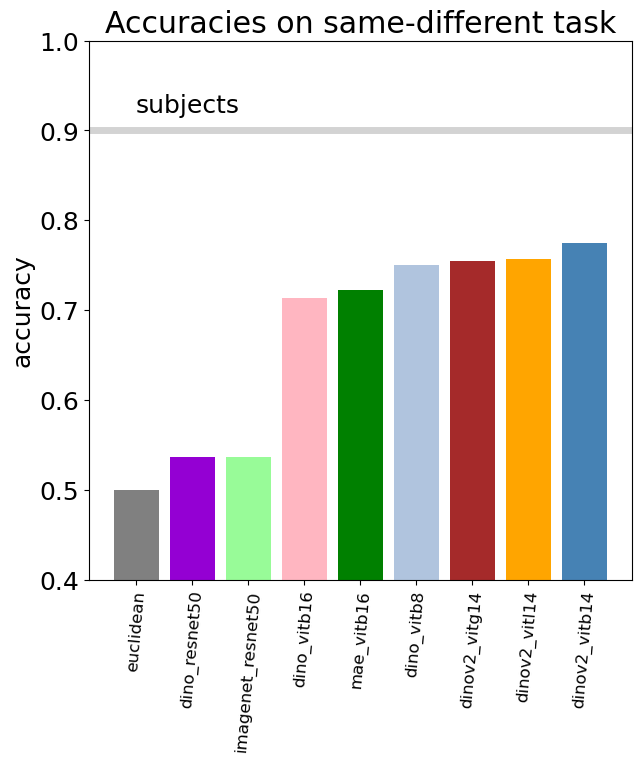

In [28]:


heights = list(df_res_sorted['model_acc'].values) 
bars = list(df_res_sorted['model_name'].values)
colors = list(df_res_sorted['color_simple'].values)
y_pos = range(len(bars))

fig, ax = plt.subplots(figsize=(7, 7))
ax.bar(y_pos, heights, color = colors)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=85, fontsize = 12)
ax.set_ylabel('accuracy')
ax.set_title('Accuracies on same-different task')
ax.set_ylim(0.4,1)

ax.axhline(y=sub_acc, color='lightgray', linestyle='-', linewidth=5)

ax.text(0,0.92,'subjects',rotation=0)

### plot correlations 

In [31]:
df_res_sorted = df_res_sorted.sort_values(by=['model_human_corr']) 
df_res_sorted

,model_name,roc_run_name,run_name,color,color_simple,auc_roc,model_acc,model_human_corr
7,imagenet_resnet50,imagenet_resnet50_test,imagenet_resnet50,palegreen,palegreen,0.611176,0.536133,0.102727
6,euclidean,distance,euclidean,gray,gray,0.000000,0.500000,0.104391
0,dino_resnet50,dino_resnet50_test,dino_resnet50,darkviolet,darkviolet,0.618234,0.536133,0.116228
4,dinov2_vitg14,dinov2_vitg14_test_14_v,dinov2_vitg14_key,#bcbd22,brown,0.806600,0.754883,0.194759
1,dino_vitb16,vit_base_test_16_v,dino_vitb16_value,lightpink,lightpink,0.796732,0.713867,0.212488
8,mae_vitb16,mae_vit_base_test_16_v,mae_vitb16_value,#d62728,green,0.840034,0.722656,0.218501
2,dino_vitb8,vit_base_test_8_v,dino_vitb8_value,magenta,lightsteelblue,0.790868,0.750000,0.226669
3,dinov2_vitb14,dinov2_vitb14_test_14_v,dinov2_vitb14_value,#e377c2,steelblue,0.870257,0.774414,0.238390
5,dinov2_vitl14,dinov2_vitl14_test_14_v,dinov2_vitl14_value,#ff7f0e,orange,0.855733,0.756836,0.241394


Text(0, 0.43, 'subject model')

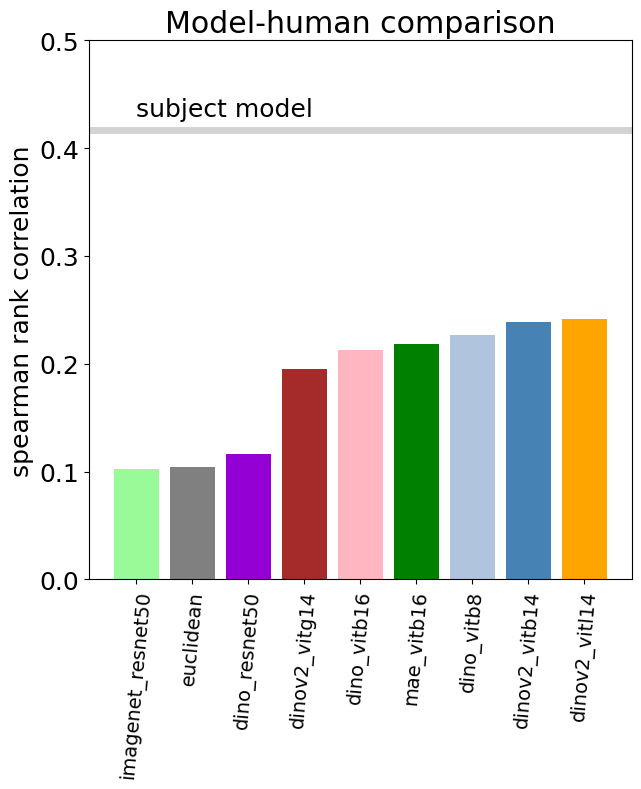

In [32]:
heights = list(df_res_sorted['model_human_corr'].values) 
bars = list(df_res_sorted['model_name'].values)
colors = list(df_res_sorted['color_simple'].values)
y_pos = range(len(bars))
fig, ax = plt.subplots(figsize=(7, 7))
plt.bar(y_pos, heights, color = colors)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=85, fontsize = 14)
ax.set_ylabel('spearman rank correlation')
ax.set_title('Model-human comparison')
ax.set_ylim(0,0.5)
plt.axhline(y=sub_sub_corr, color='lightgray', linestyle='-', linewidth=5)

plt.text(0,0.43,'subject model',rotation=0)

#fig.savefig("figures/model_human_rt_comp_sim.png", bbox_inches='tight', dpi=300)

### Plot the behavior of a model

In [122]:
exp_name = "dinov2_vitb14_test_14_k_0.8_0.02.npy"
df_comp = df_test.copy()
model_preds = np.load(model_restuls_dir + exp_name) 

df_comp['model_pred'] = list(model_preds)

In [123]:
# plot average RTs for each condition


def beh_summ(dv):
    
    summ_rts = []
    for cf in ['close', 'far']:
        for sd in ['same', 'diff']:

            df_comp_cond = df_comp[(df_comp['close_far']==cf) & (df_comp['same_diff']==sd)]
            #print(sd, cf, df_comp_cond['model_pred'].mean(), df_comp_cond['model_pred'].sem())
            summ =  df_comp_cond[dv].mean(), df_comp_cond[dv].sem()
            summ_rts.append(summ)

            print(sd, cf,summ)

    summ_rts = np.array(summ_rts)
    
    return summ_rts

def plt_summ(summ_rts, ylim):
    
    fig = plt.figure(figsize=(4, 4))

    labels = ['Same', 'Different']
    close_means = summ_rts[0:2,0]
    close_ses = summ_rts[0:2,1]

    far_means = summ_rts[2:4,0]
    far_ses = summ_rts[2:4,1]


    x =np.array([0, 1.5])  # the label locations
    width = 0.5  # the width of the bars

    plt.rcParams.update({'font.size': 18})

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, close_means, width, label='Close', edgecolor = 'black', color = ['lightgreen', 'lightblue'], yerr=close_ses, capsize=3, hatch='/')

    rects2 = ax.bar(x + width/2, far_means, width, label='Far', edgecolor = 'black', color =['green', 'steelblue'], yerr=far_ses, capsize=3, hatch='/')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of model steps')
    ax.set_title('')
    ax.set_xticks(x)  # , labels=labels
    ax.set_xticklabels(labels)
    #ax.legend() 
    ax.set_ylim(ylim) #(35, 60)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)

    plt.tight_layout()
    plt.show()
    
    #fig.savefig("figures/model_steps_poster_75.png", bbox_inches='tight', dpi=300)

same close (8.04313725490196, 0.29936182160492014)
diff close (14.611764705882353, 0.2804021436101213)
same far (10.933333333333334, 0.2584937147516467)
diff far (16.615686274509805, 0.23053653427931267)


<Figure size 400x400 with 0 Axes>

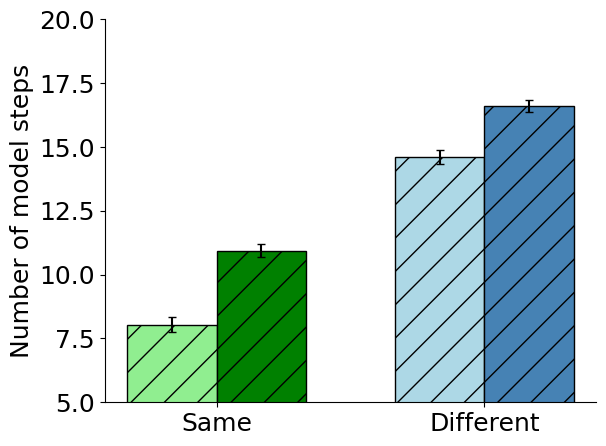

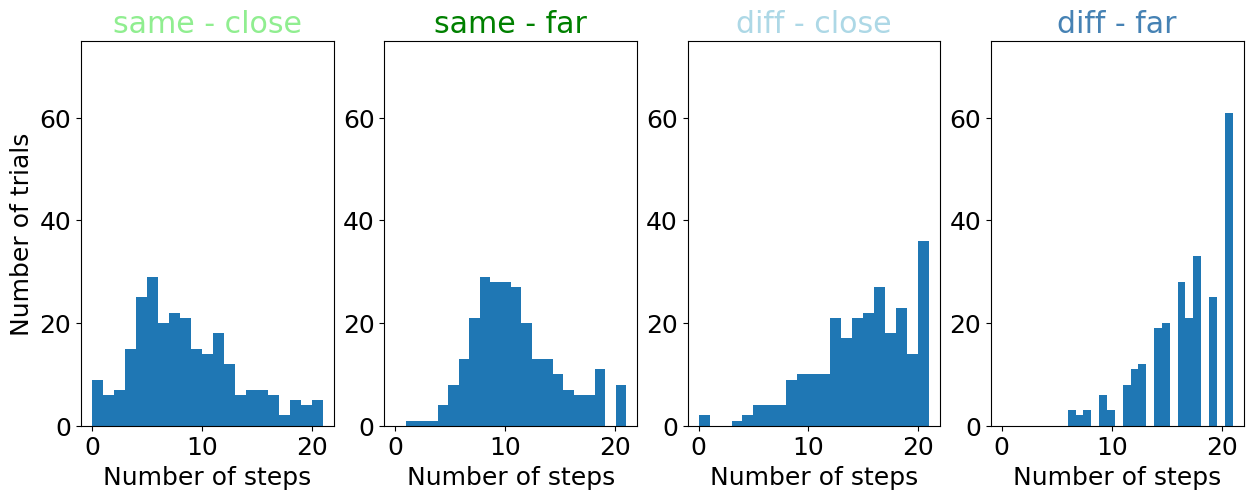

In [124]:
summ_rts = beh_summ('model_pred')
plt_summ(summ_rts, (5,20))

color = ['lightgreen', 'green', 'lightblue', 'steelblue']

plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(15, 5))
# and we add one plot per reference point
gs = fig.add_gridspec(1, 4)
# fig.subplots_adjust(wspace=0.1, hspace=0.5)

ind = 0 
for sd in ['same', 'diff']:
    for cf in ['close', 'far']:

        ax = plt.subplot(gs[0,ind])
        ax.hist(df_comp[(df_comp['close_far']==cf) & (df_comp['same_diff']==sd)]['model_pred'], bins = 21)
        ax.set_title('{} - {}'.format(sd,cf), color =color[ind])
        if ind == 0:
            ax.set_ylabel('Number of trials')
        ax.set_xlabel('Number of steps')
        ax.set_xlim(-1,22)
        ax.set_ylim(0,75)
        ind = ind+1
        
plt.show()

# summ_rts = beh_summ('subs_mean_p')
# plt_summ(summ_rts, (40,60))

#fig.savefig("figures/model_steps_hist_poster_75.png", bbox_inches='tight', dpi=300)

### 































